In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
# !unzip Loan_borrower.zip

In [3]:
df = pd.read_csv('loan_borowwer_data .csv')
df.sample(5)

credit.policy             purpose  int.rate  installment  \
8557              0         credit_card    0.1418       136.21   
3447              1  debt_consolidation    0.1189        99.50   
299               1           all_other    0.0901       381.66   
733               1  debt_consolidation    0.1008       290.75   
2538              1  debt_consolidation    0.0800       203.69   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
8557       10.085809  29.70   727        5640.000000       9862        16.4   
3447       10.348173   7.35   687        2399.958333       2572        30.3   
299        11.695247   4.28   722        4080.041667       7335        45.8   
733        10.571317   5.17   707        2190.000000       8486        66.8   
2538       11.429544   6.59   807        8190.000000        713         3.9   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
8557               0            1        0               0  
3447               0            0        0               0  
299                1            1        0               0  
733                1            0        0               0  
2538               0            0        0               0

In [4]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


(None,
    credit.policy             purpose  int.rate  installment  log.annual.inc  \
 0              1  debt_consolidation    0.1189       829.10       11.350407   
 1              1         credit_card    0.1071       228.22       11.082143   
 2              1  debt_consolidation    0.1357       366.86       10.373491   
 3              1  debt_consolidation    0.1008       162.34       11.350407   
 4              1         credit_card    0.1426       102.92       11.299732   
 
      dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
 0  19.48   737        5639.958333      28854        52.1               0   
 1  14.29   707        2760.000000      33623        76.7               0   
 2  11.63   682        4710.000000       3511        25.6               1   
 3   8.10   712        2699.958333      33667        73.2               1   
 4  14.97   667        4066.000000       4740        39.5               0   
 
    delinq.2yrs  pub.rec  not.fully.paid  
 0  

In [5]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

### Target - >  Purpose

In [7]:
le = LabelEncoder()  
df['purpose'] = le.fit_transform(df['purpose'])  # Encode 'label' column (e.g., male=1, female=0).
df.sample(5)

credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
9433              0        0    0.1322       331.25       10.463103  13.06   
6669              1        5    0.0859       252.89       10.933107   1.82   
9113              0        3    0.0768        31.20       11.759786  14.31   
7405              1        2    0.1311       674.90       10.968198   8.30   
857               1        2    0.1229        23.35        9.852194  12.38   

      fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
9433   702        5370.000000       5088        45.4               5   
6669   752        3510.041667       3258         5.5               2   
9113   792        6540.000000     167381         0.0               0   
7405   717        2730.041667      18339        84.2               0   
857    662        1199.958333          0        53.2               1   

      delinq.2yrs  pub.rec  not.fully.paid  
9433            0        0               1  
6669            0        0               0  
9113            0        0               0  
7405            0        0               0  
857             0        0               0

In [8]:
df["purpose"].value_counts()

purpose
2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: count, dtype: int64

In [9]:
df["purpose"].values

array([2, 1, 2, ..., 2, 4, 2])

In [10]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [11]:
df.corr(numeric_only=True)

credit.policy   purpose  int.rate  installment  \
credit.policy           1.000000  0.017569 -0.294089     0.058770   
purpose                 0.017569  1.000000  0.117067     0.154827   
int.rate               -0.294089  0.117067  1.000000     0.276140   
installment             0.058770  0.154827  0.276140     1.000000   
log.annual.inc          0.034906  0.088958  0.056383     0.448102   
dti                    -0.090901 -0.053279  0.220006     0.050202   
fico                    0.348319  0.057337 -0.714821     0.086039   
days.with.cr.line       0.099026  0.047526 -0.124022     0.183297   
revol.bal              -0.187518  0.042364  0.092527     0.233625   
revol.util             -0.104095 -0.062947  0.464837     0.081356   
inq.last.6mths         -0.535511  0.037516  0.202780    -0.010419   
delinq.2yrs            -0.076318 -0.011701  0.156079    -0.004368   
pub.rec                -0.054243  0.004793  0.098162    -0.032760   
not.fully.paid         -0.158119  0.047907  0.159552     0.049955   

                   log.annual.inc       dti      fico  days.with.cr.line  \
credit.policy            0.034906 -0.090901  0.348319           0.099026   
purpose                  0.088958 -0.053279  0.057337           0.047526   
int.rate                 0.056383  0.220006 -0.714821          -0.124022   
installment              0.448102  0.050202  0.086039           0.183297   
log.annual.inc           1.000000 -0.054065  0.114576           0.336896   
dti                     -0.054065  1.000000 -0.241191           0.060101   
fico                     0.114576 -0.241191  1.000000           0.263880   
days.with.cr.line        0.336896  0.060101  0.263880           1.000000   
revol.bal                0.372140  0.188748 -0.015553           0.229344   
revol.util               0.054881  0.337109 -0.541289          -0.024239   
inq.last.6mths           0.029171  0.029189 -0.185293          -0.041736   
delinq.2yrs              0.029203 -0.021792 -0.216340           0.081374   
pub.rec                  0.016506  0.006209 -0.147592           0.071826   
not.fully.paid          -0.033439  0.037362 -0.149666          -0.029237   

                   revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
credit.policy      -0.187518   -0.104095       -0.535511    -0.076318   
purpose             0.042364   -0.062947        0.037516    -0.011701   
int.rate            0.092527    0.464837        0.202780     0.156079   
installment         0.233625    0.081356       -0.010419    -0.004368   
log.annual.inc      0.372140    0.054881        0.029171     0.029203   
dti                 0.188748    0.337109        0.029189    -0.021792   
fico               -0.015553   -0.541289       -0.185293    -0.216340   
days.with.cr.line   0.229344   -0.024239       -0.041736     0.081374   
revol.bal           1.000000    0.203779        0.022394    -0.033243   
revol.util          0.203779    1.000000       -0.013880    -0.042740   
inq.last.6mths      0.022394   -0.013880        1.000000     0.021245   
delinq.2yrs        -0.033243   -0.042740        0.021245     1.000000   
pub.rec            -0.031010    0.066717        0.072673     0.009184   
not.fully.paid      0.053699    0.082088        0.149452     0.008881   

                    pub.rec  not.fully.paid  
credit.policy     -0.054243       -0.158119  
purpose            0.004793        0.047907  
int.rate           0.098162        0.159552  
installment       -0.032760        0.049955  
log.annual.inc     0.016506       -0.033439  
dti                0.006209        0.037362  
fico              -0.147592       -0.149666  
days.with.cr.line  0.071826       -0.029237  
revol.bal         -0.031010        0.053699  
revol.util         0.066717        0.082088  
inq.last.6mths     0.072673        0.149452  
delinq.2yrs        0.009184        0.008881  
pub.rec            1.000000        0.048634  
not.fully.paid     0.048634        1.000000

<Axes: >

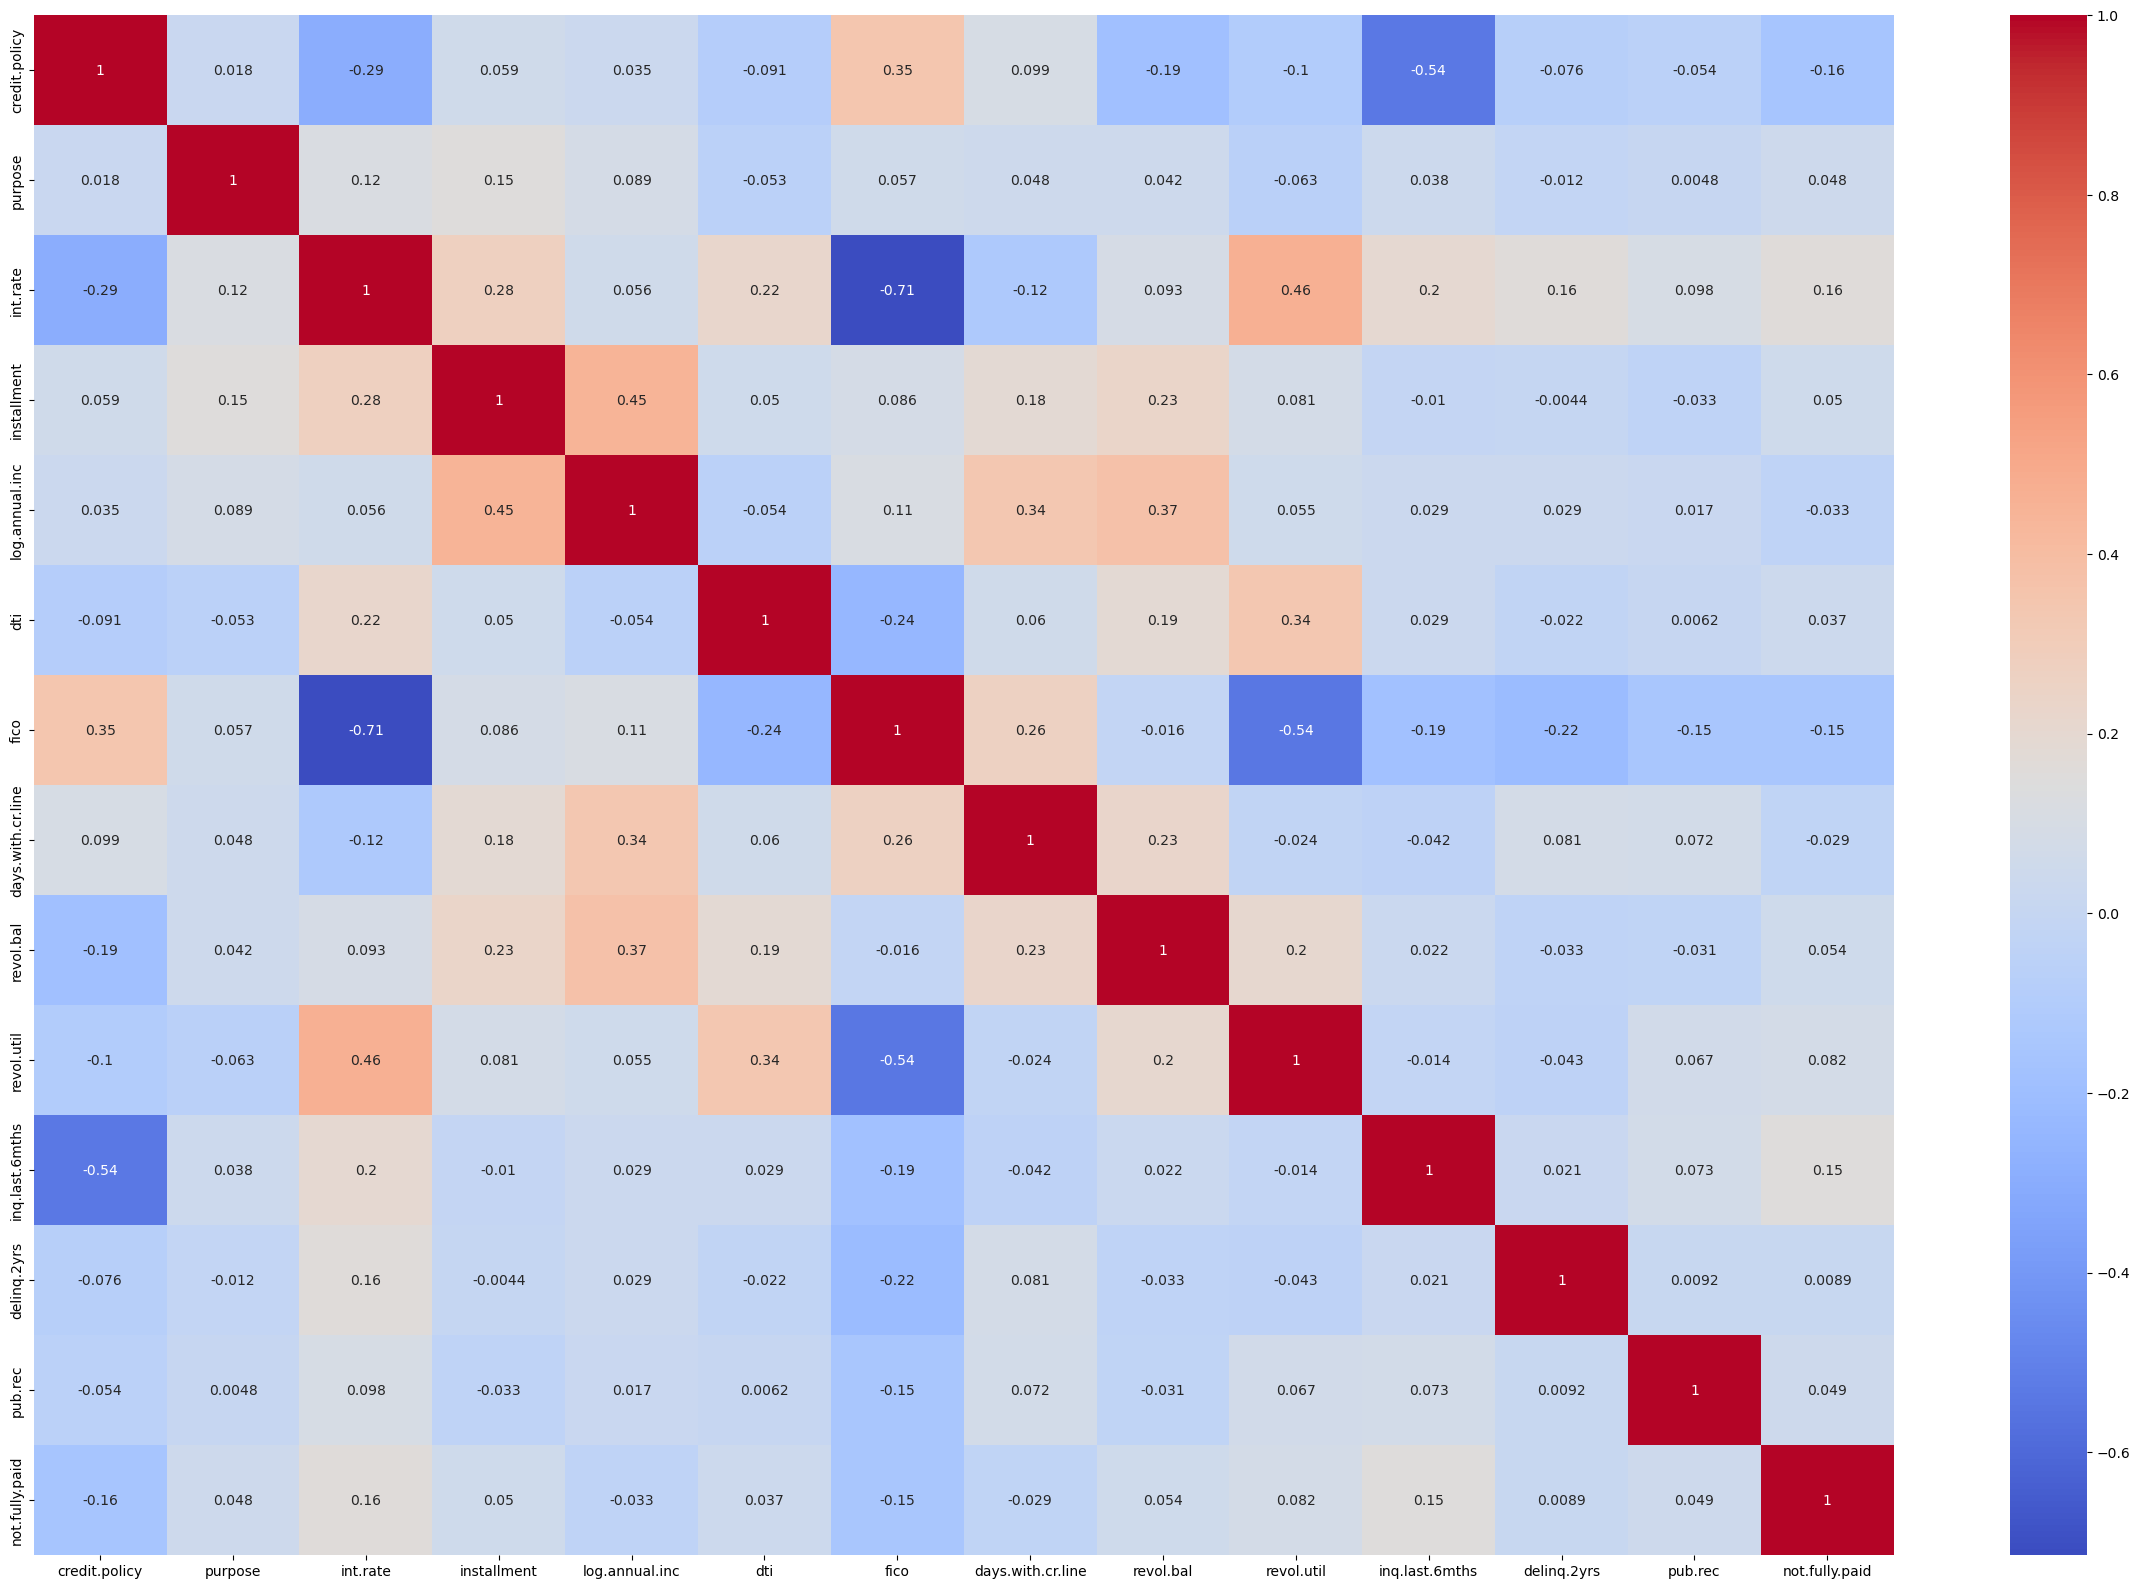

In [12]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm', annot= True)

<Axes: xlabel='installment', ylabel='log.annual.inc'>

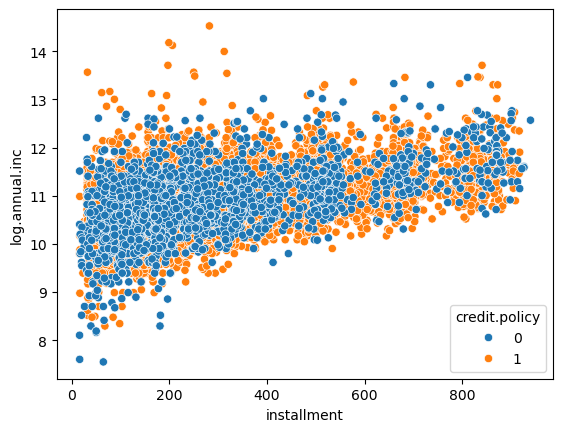

In [13]:
sns.scatterplot(data =df, x = "installment", y = "log.annual.inc", hue="credit.policy")
## those who paid fully -> 0, Those who Not fully paid -> 1

<Axes: xlabel='int.rate', ylabel='revol.util'>

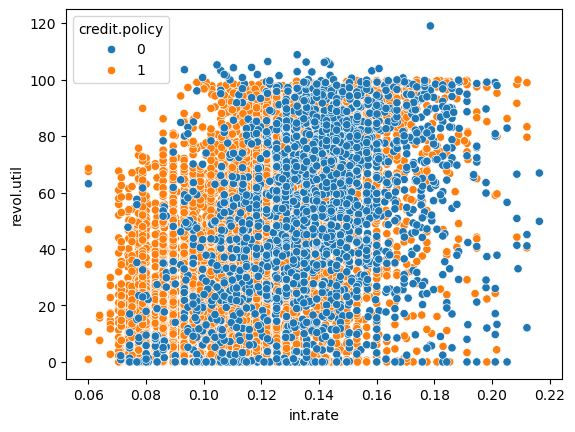

In [14]:
sns.scatterplot(data = df, x = "int.rate", y = "revol.util", hue = "credit.policy")

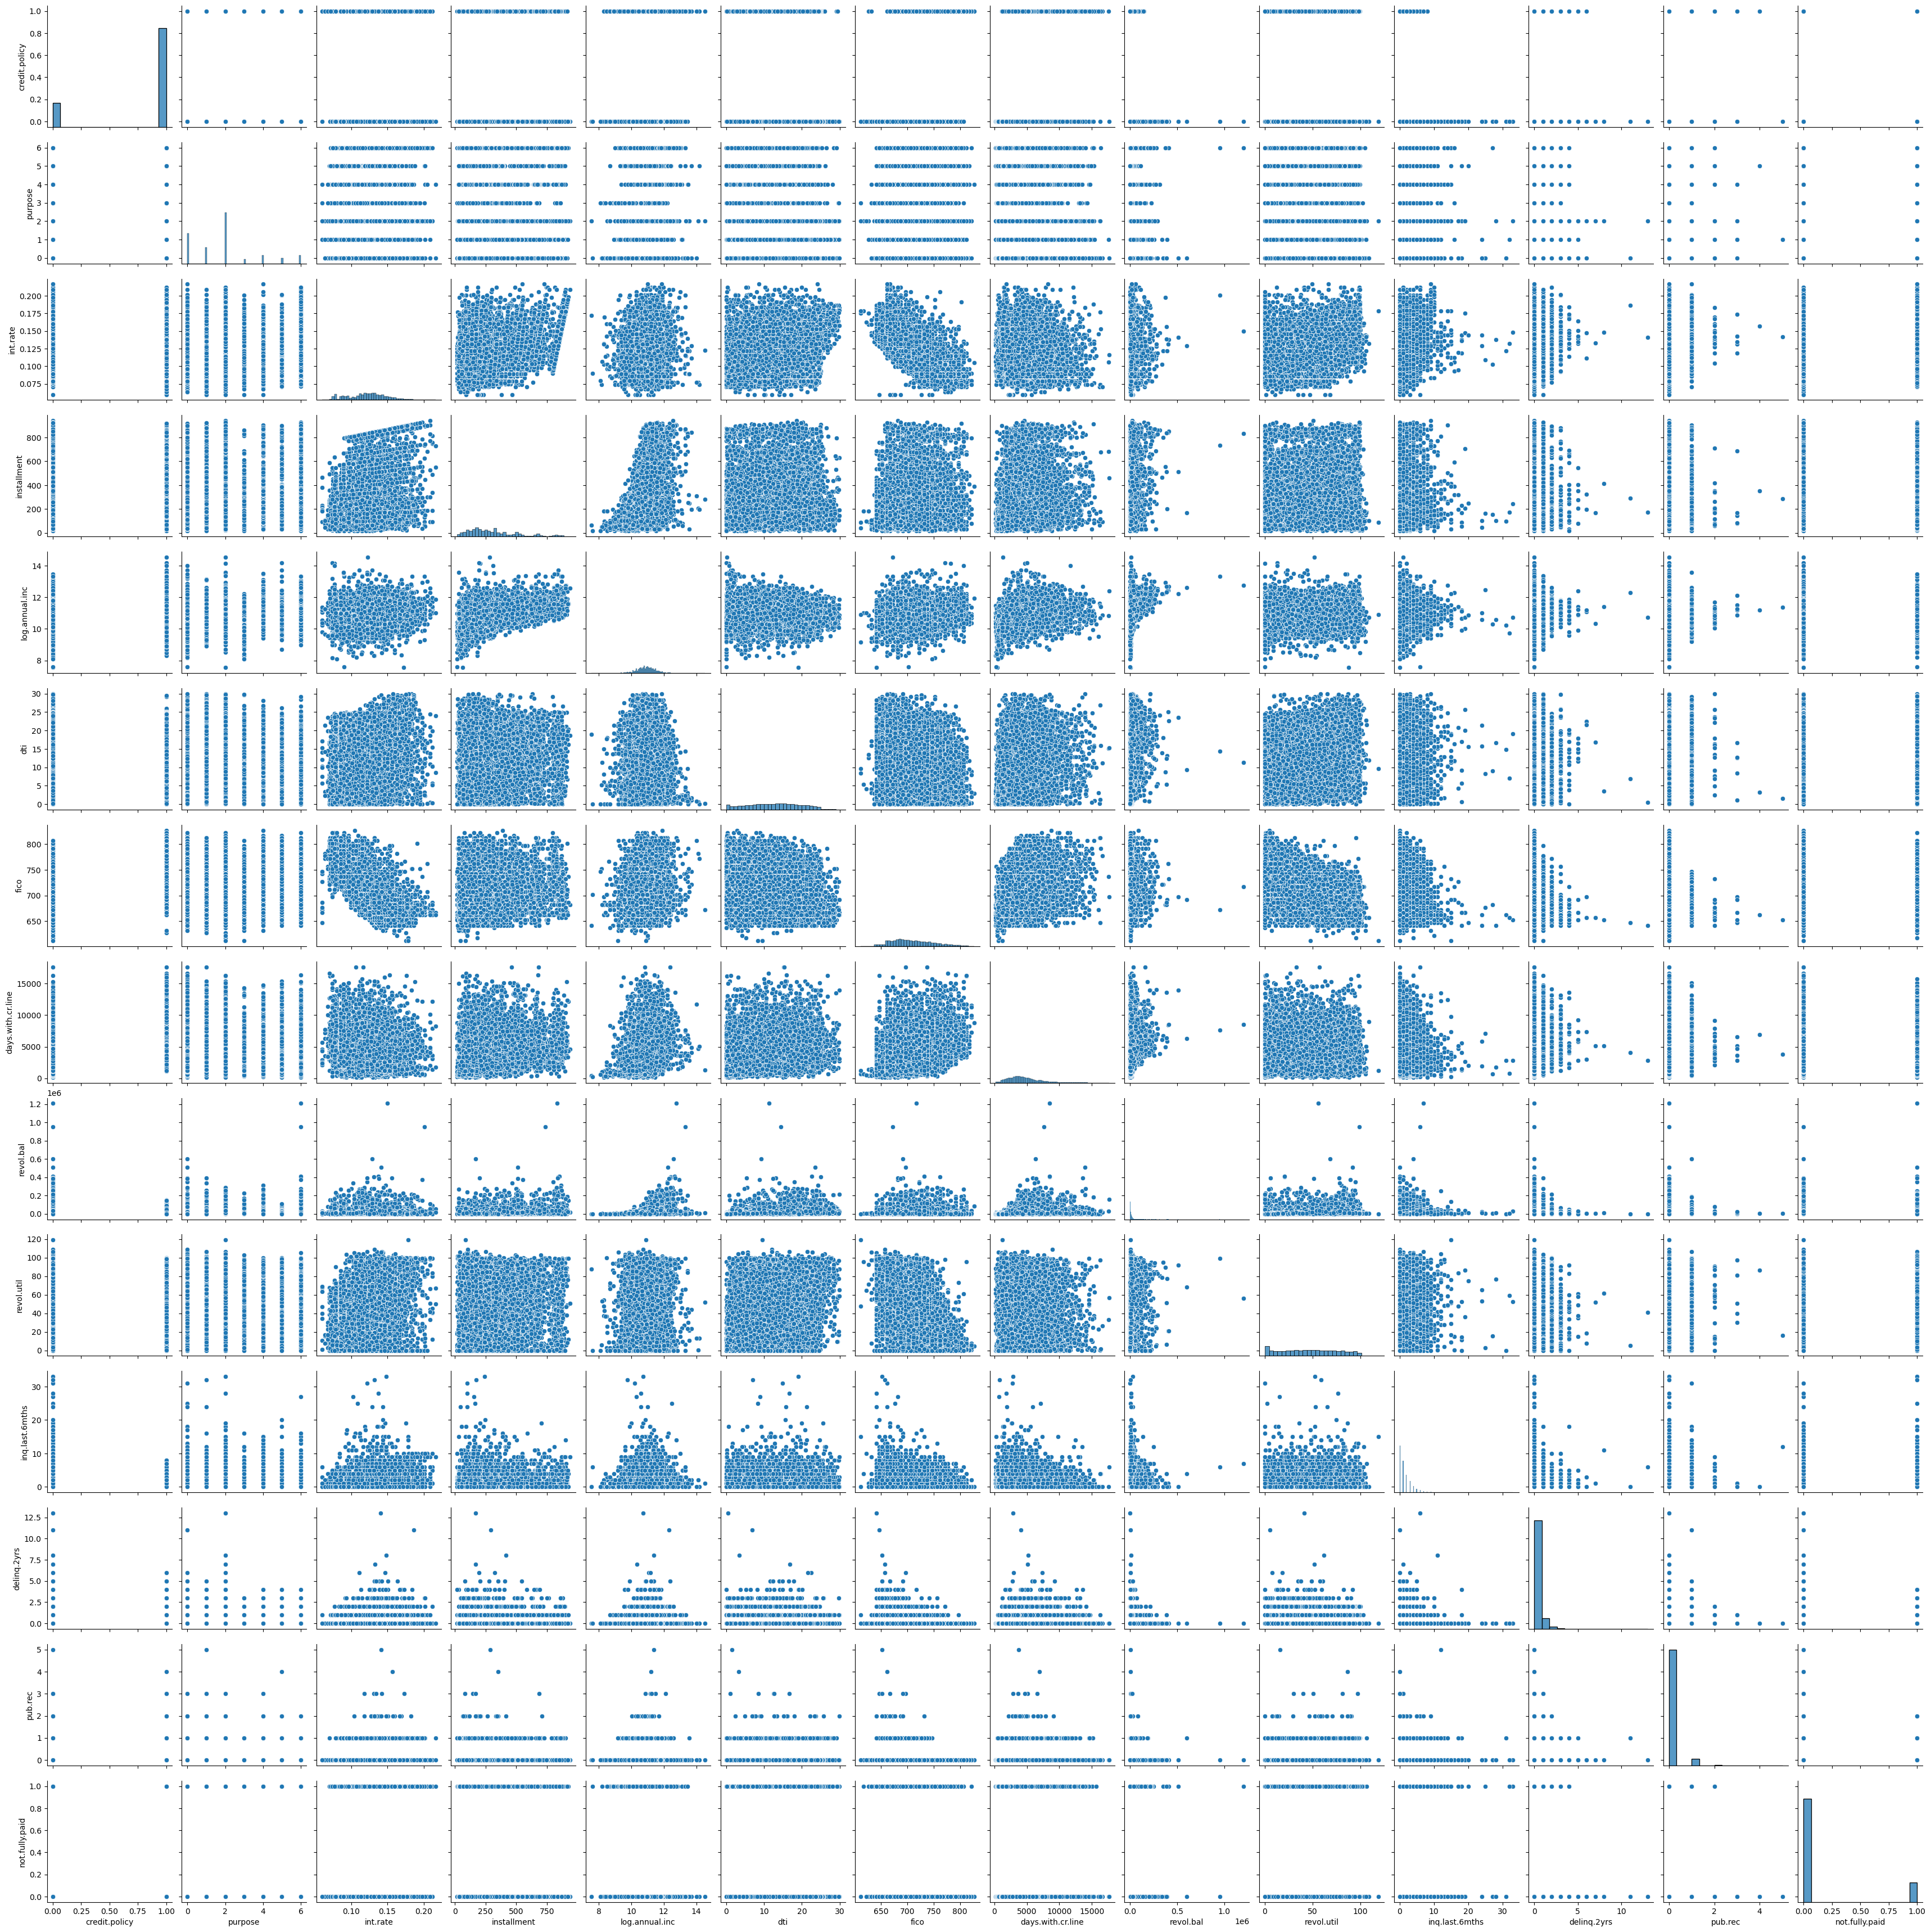

In [15]:
sns.pairplot(df)

<Axes: xlabel='int.rate', ylabel='fico'>

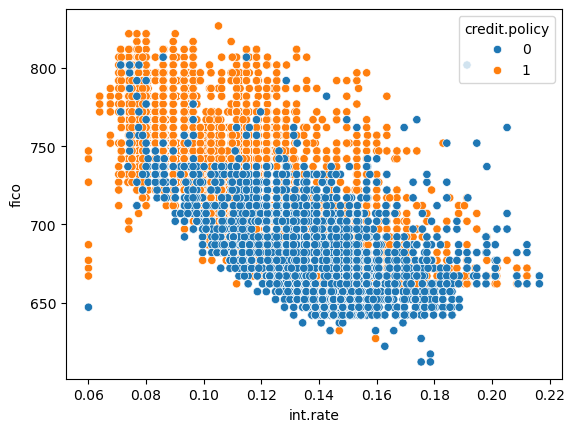

In [16]:
sns.scatterplot(data = df, x = "int.rate", y = "fico", hue = "credit.policy")   
# Showing nstrongly Neggative Correlation

In [17]:
df.sample(10)

credit.policy  purpose  int.rate  installment  log.annual.inc    dti  \
7391              1        2    0.1348       169.63       10.491274  11.90   
4210              1        1    0.1322        87.89       10.203592   9.51   
3397              1        4    0.1496       866.16       11.695247  16.28   
3541              1        2    0.1126       394.36       11.156251  11.38   
175               1        1    0.1091       192.09       11.097410  19.82   
3700              1        2    0.1316       607.87       11.385092   8.71   
4455              1        2    0.0894       285.95       10.834864  21.49   
3712              1        2    0.1607       457.52       10.959540  23.85   
742               1        0    0.0976       803.87       11.156251   4.92   
1856              1        6    0.1284       504.27       12.114505  20.69   

      fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
7391   707       11280.000000      12487        81.1               0   
4210   692        1619.958333         47         0.5               3   
3397   702        7020.000000      73257        60.0               0   
3541   732        3660.000000       6789        16.3               1   
175    677        4290.000000      30597        89.5               1   
3700   697        4199.958333      15008        44.8               0   
4455   737        2910.000000       2695        38.5               1   
3712   662        3240.000000       8373        57.0               0   
742    792        4140.000000       3114        11.3               0   
1856   697        3149.041667      84844        79.4               3   

      delinq.2yrs  pub.rec  not.fully.paid  
7391            0        1               0  
4210            1        0               0  
3397            0        0               0  
3541            1        0               0  
175             1        0               0  
3700            1        0               0  
4455            0        0               0  
3712            1        0               1  
742             0        0               0  
1856            0        0               0

#  Important Features
### Credit Policy, purpose, int.rate, installment, log.annual.inc, fico, 

In [19]:
X  = df.drop(columns=["not.fully.paid"])
Y = df["not.fully.paid"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = lr.predict(x_test)

In [23]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8385525400139179

# Decision Tree

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred_dt = dt.predict(x_test)

[Text(0.3603856907438404, 0.9861111111111112, 'x[0] <= 0.5\ngini = 0.268\nsamples = 6704\nvalue = [5637, 1067]'),
 Text(0.13329193548441537, 0.9583333333333334, 'x[10] <= 5.5\ngini = 0.401\nsamples = 1310\nvalue = [947, 363]'),
 Text(0.2468388131141279, 0.9722222222222223, 'True  '),
 Text(0.06772230583690894, 0.9305555555555556, 'x[2] <= 0.16\ngini = 0.374\nsamples = 996\nvalue = [748, 248]'),
 Text(0.016165476409069676, 0.9027777777777778, 'x[5] <= 0.25\ngini = 0.352\nsamples = 842\nvalue = [650, 192]'),
 Text(0.004147618494706116, 0.875, 'x[6] <= 724.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.002765078996470744, 0.8472222222222222, 'x[10] <= 4.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.001382539498235372, 0.8194444444444444, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.004147618494706116, 0.8194444444444444, 'x[3] <= 168.875\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.002765078996470744, 0.7916666666666666, 'gini = 0.0\nsamples = 1\nvalue = 

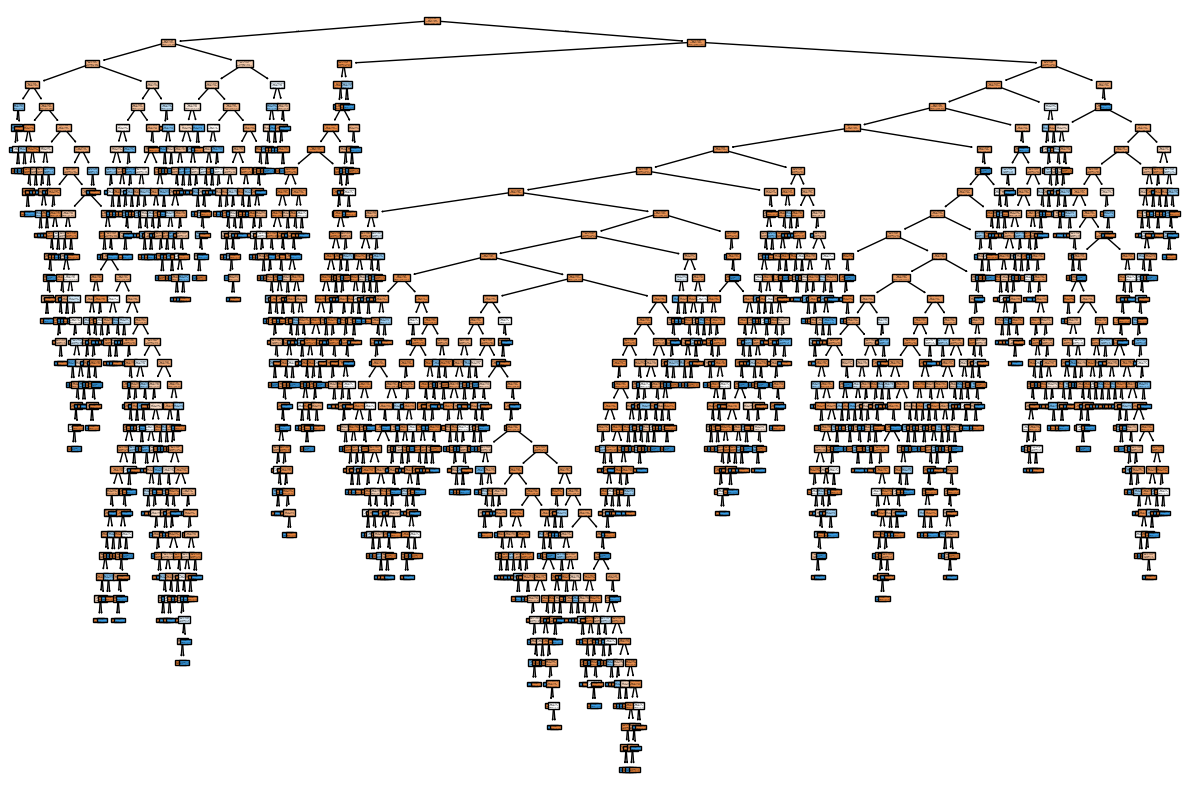

In [34]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled=True)

In [41]:
accuracy = accuracy_score(y_pred_dt, y_test)
accuracy

0.7331245650661099

In [44]:
precission = precision_score(y_pred_dt, y_test)
precission

0.19527896995708155

In [47]:
recall = recall_score(y_test, y_pred_dt)
recall

0.19527896995708155

In [50]:
f1 = f1_score(y_test, y_pred_dt)
f1

0.1917808219178082

In [53]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[2016,  392],
       [ 375,   91]], dtype=int64)